## Cat and Dog Classification

Given *images of cats and dogs*, let's try to classify which **pet** is present in a given image.

We will use a Tensorflow/Keras CNN to make our predictions.

Data source: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification

### Importing Libraries

In [71]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [53]:
image_dir = Path('archive/')

### Create File DataFrame

In [54]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
filepaths

[PosixPath('archive/train/dogs/dog_494.jpg'),
 PosixPath('archive/train/dogs/dog_502.jpg'),
 PosixPath('archive/train/dogs/dog_423.jpg'),
 PosixPath('archive/train/dogs/dog_391.jpg'),
 PosixPath('archive/train/dogs/dog_113.jpg'),
 PosixPath('archive/train/dogs/dog_408.jpg'),
 PosixPath('archive/train/dogs/dog_571.jpg'),
 PosixPath('archive/train/dogs/dog_306.jpg'),
 PosixPath('archive/train/dogs/dog_324.jpg'),
 PosixPath('archive/train/dogs/dog_441.jpg'),
 PosixPath('archive/train/dogs/dog_576.jpg'),
 PosixPath('archive/train/dogs/dog_334.jpg'),
 PosixPath('archive/train/dogs/dog_193.jpg'),
 PosixPath('archive/train/dogs/dog_419.jpg'),
 PosixPath('archive/train/dogs/dog_92.jpg'),
 PosixPath('archive/train/dogs/dog_444.jpg'),
 PosixPath('archive/train/dogs/dog_535.jpg'),
 PosixPath('archive/train/dogs/dog_226.jpg'),
 PosixPath('archive/train/dogs/dog_86.jpg'),
 PosixPath('archive/train/dogs/dog_484.jpg'),
 PosixPath('archive/train/dogs/dog_546.jpg'),
 PosixPath('archive/train/dogs/dog_8

In [55]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 

In [56]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [57]:
image_df

,Filepath,Label
0,archive/train/dogs/dog_494.jpg,dogs
1,archive/train/dogs/dog_502.jpg,dogs
2,archive/train/dogs/dog_423.jpg,dogs
3,archive/train/dogs/dog_391.jpg,dogs
4,archive/train/dogs/dog_113.jpg,dogs
...,...,...
552,archive/train/cats/cat_6.jpg,cats
553,archive/train/cats/cat_69.jpg,cats
554,archive/train/cats/cat_331.jpg,cats
555,archive/train/cats/cat_218.jpg,cats


In [58]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=123)

In [59]:
train_df

,Filepath,Label
20,archive/train/dogs/dog_546.jpg,dogs
399,archive/train/cats/cat_506.jpg,cats
405,archive/train/cats/cat_228.jpg,cats
436,archive/train/cats/cat_217.jpg,cats
200,archive/train/dogs/dog_466.jpg,dogs
...,...,...
98,archive/train/dogs/dog_164.jpg,dogs
322,archive/train/cats/cat_345.jpg,cats
382,archive/train/cats/cat_225.jpg,cats
365,archive/train/cats/cat_146.jpg,cats


### Load Image Data

In [60]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0 / 255,
    horizontal_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split = 0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0 / 255
)

In [61]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 312 validated image filenames belonging to 2 classes.
Found 77 validated image filenames belonging to 2 classes.
Found 168 validated image filenames belonging to 2 classes.


### Training

In [64]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [65]:
train_images.class_indices

{'cats': 0, 'dogs': 1}

In [66]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_images,
    validation_data = val_images,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


2025-10-31 10:54:49.405791: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2025-10-31 10:54:49.418448: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100933632 exceeds 10% of free system memory.
2025-10-31 10:54:49.742974: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25233408 exceeds 10% of free system memory.
2025-10-31 10:54:49.782747: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 48664576 exceeds 10% of free system memory.
2025-10-31 10:54:49.907760: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23887872 exceeds 10% of free system memory.


10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5000 - loss: 0.6942 - val_accuracy: 0.6104 - val_loss: 0.6908 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5641 - loss: 0.6885 - val_accuracy: 0.5195 - val_loss: 0.6920 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5929 - loss: 0.6838 - val_accuracy: 0.5714 - val_loss: 0.6835 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5481 - loss: 0.6851 - val_accuracy: 0.4805 - val_loss: 0.7013 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6122 - loss: 0.6735 - val_accuracy: 0.5974 - val_loss: 0.6857 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6186 - loss: 0.6671 - val_accuracy: 0.4935 - val_loss: 0.7106 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5224 - loss: 0.6746 - val_accuracy: 0.545

### Results

In [67]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.69819
Test Accuracy: 50.00%


In [69]:
predictions = np.squeeze((model.predict(test_images) >= 0.5).astype(int))
predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

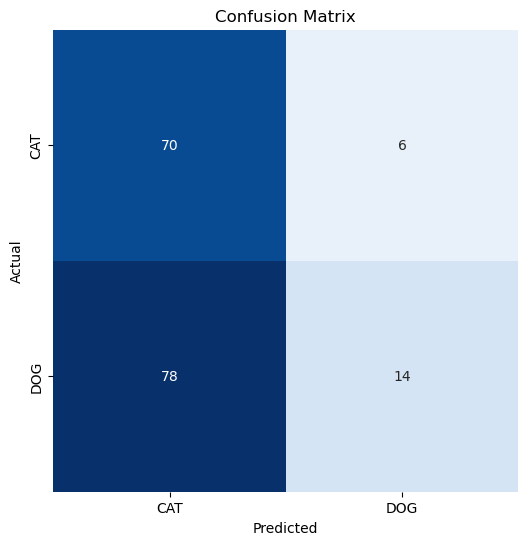

In [70]:
cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['CAT', 'DOG'])
plt.yticks(ticks=[0.5, 1.5], labels=['CAT', 'DOG'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [73]:
clr = classification_report(test_images.labels, predictions, target_names=['CAT', 'DOG'])
print("Classification Report:\n---------------------------------------\n", clr)

Classification Report:
---------------------------------------
               precision    recall  f1-score   support

         CAT       0.47      0.92      0.62        76
         DOG       0.70      0.15      0.25        92

    accuracy                           0.50       168
   macro avg       0.59      0.54      0.44       168
weighted avg       0.60      0.50      0.42       168

